## Librerías

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input
from google.colab import files
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


## Dataset

In [ ]:
# URLs del dataset
train_url = "https://raw.githubusercontent.com/LaraV15/ComputerVision/refs/heads/main/train_landmarks.csv"
test_url = "https://raw.githubusercontent.com/LaraV15/ComputerVision/refs/heads/main/test_landmarks.csv"

# Leer los datos
train_data = pd.read_csv(train_url)
test_data = pd.read_csv(test_url)

# Cargar los datos desde los archivos CSV
train_data = pd.read_csv(train_url)
test_data = pd.read_csv(test_url)



In [ ]:
# Contar los datos por clase y ordenarlos de menor a mayor por los labels
train_class_counts = train_data['label'].value_counts().sort_index()
print("Cantidad de datos por clase en el conjunto de entrenamiento (ordenados por etiquetas):")
print(train_class_counts)

test_class_counts = test_data['label'].value_counts().sort_index()
print("\nCantidad de datos por clase en el conjunto de prueba (ordenados por etiquetas):")
print(test_class_counts)


Cantidad de datos por clase en el conjunto de entrenamiento (ordenados por etiquetas):
label
0     20
1     50
2      2
3      4
4     56
5      5
6      4
7      2
8     56
11     4
12    12
13    13
14     2
15     5
16     5
17    22
18     1
19     2
20     9
21    20
22     9
23    17
24    14
Name: count, dtype: int64

Cantidad de datos por clase en el conjunto de prueba (ordenados por etiquetas):
label
0     21
1     26
3     12
4      5
6      5
8     13
12    19
14     2
15     8
17     4
18     6
20     1
21     1
22     1
23     3
24     1
Name: count, dtype: int64


In [ ]:
# Separar características (landmarks) y etiquetas
y_train = train_data.iloc[:, 0].values   # Primera columna (labels)
X_train = train_data.iloc[:, 1:].values  # Todas las columnas excepto la primera (features)

y_test = test_data.iloc[:, 0].values     # Primera columna (labels)
X_test = test_data.iloc[:, 1:].values    # Todas las columnas excepto la primera (features)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
len(X_train)

334

Analizamos si el dataset está balanceado

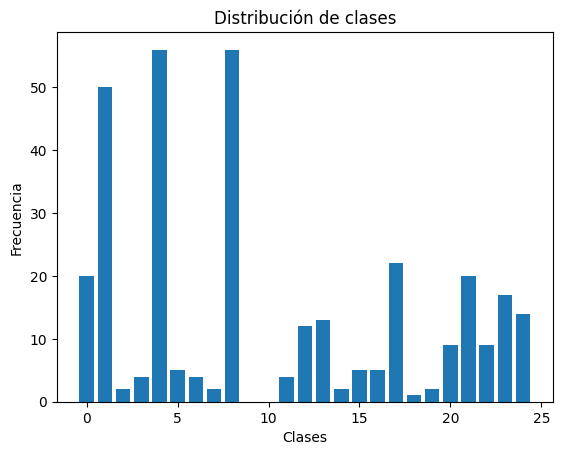

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.title("Distribución de clases")
plt.xlabel("Clases")
plt.ylabel("Frecuencia")
plt.show()

Para balancear las clases podríamos

- Aumentar artificialmente las clases minoritarias (data augmentation).
- Aplicar técnicas de sobremuestreo como SMOTE o undersampling para las clases mayoritarias.

Realizaremos la primera opción

In [ ]:
len(np.unique(y_train))

23

In [ ]:
# Determinar el número de clases basado en el valor máximo de las etiquetas
num_classes = np.max(y_train) + 1  # El número de clases debe incluir el índice más alto
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)


## Modelo 1

In [ ]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Definir explícitamente la capa de entrada
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 472ms/step - accuracy: 0.0313 - loss: 3.6078 - val_accuracy: 0.2537 - val_loss: 2.9822
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1477 - loss: 2.9983 - val_accuracy: 0.3731 - val_loss: 2.6649
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3020 - loss: 2.7114 - val_accuracy: 0.3881 - val_loss: 2.4077
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4173 - loss: 2.3841 - val_accuracy: 0.4627 - val_loss: 2.1936
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4637 - loss: 2.1219 - val_accuracy: 0.4627 - val_loss: 2.0574
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4609 - loss: 1.9794 - val_accuracy: 0.5075 - val_loss: 1.9645
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5031 - loss: 1.8040 - val_accuracy: 0.5075 - val_loss: 1.8894
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4925 - loss: 1.8314 - val_accuracy: 0.5075 - val_loss: 1.8250
Epoch 

In [ ]:
# Guardar el modelo entrenado
model.save('asl_model.h5')

In [ ]:
files.download('asl_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy en datos de prueba: {test_accuracy:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5552 - loss: 2.1610 
Accuracy en datos de prueba: 0.58


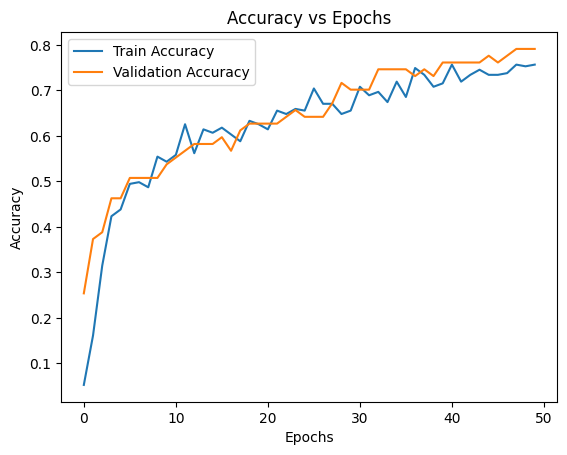

In [ ]:
# Graficar el accuracy durante el entrenamiento
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

## Model 2

In [ ]:
model_2 = Sequential([
    Dense(256, input_shape=(X_train.shape[1],)),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),
    Dense(128),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

In [ ]:
# Compilar el modelo
model_2.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Entrenar el modelo
history_2 = model_2.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 249ms/step - accuracy: 0.1067 - loss: 3.3573 - val_accuracy: 0.4776 - val_loss: 2.6492
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3279 - loss: 2.5926 - val_accuracy: 0.5224 - val_loss: 2.1970
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5377 - loss: 2.0325 - val_accuracy: 0.5224 - val_loss: 1.9929
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5923 - loss: 1.7978 - val_accuracy: 0.5224 - val_loss: 1.8525
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5373 - loss: 1.6733 - val_accuracy: 0.5075 - val_loss: 1.7519
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6034 - loss: 1.4916 - val_accuracy: 0.5224 - val_loss: 1.6781
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5937 - loss: 1.4067 - val_accuracy: 0.5522 - val_loss: 1.6106
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6227 - loss: 1.3012 - val_accuracy: 0.5821 - val_loss: 1.5

In [ ]:
# Guardar el modelo entrenado
model_2.save('asl_model_2.h5')

In [ ]:
files.download('asl_model_2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = model_2.evaluate(X_test, y_test)
print(f"Accuracy en datos de prueba: {test_accuracy:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6083 - loss: 3.3771 
Accuracy en datos de prueba: 0.64


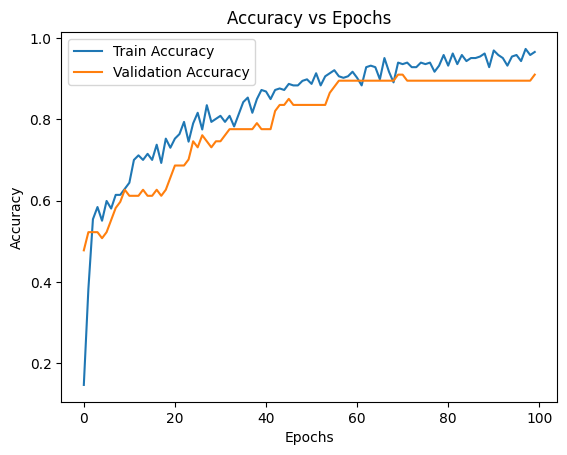

In [ ]:
# Graficar el accuracy durante el entrenamiento
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

Para seguir intentando mejorar las métricas ahora realizo Data Argumentacion

## Modelo 3

1. **Ruido Aleatorio**
Se agrega un pequeño valor aleatorio a cada coordenada de los landmarks para simular ligeras variaciones.

In [ ]:
def add_random_noise(data, noise_level=0.02):
    """
    Añade ruido aleatorio a los landmarks.
    :param data: Array de landmarks (ejemplo: (n_samples, n_landmarks)).
    :param noise_level: Amplitud del ruido (porcentaje relativo).
    :return: Array con ruido añadido.
    """
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise


2. **Rotación**
Se aplica una rotación a las coordenadas de los landmarks para simular una orientación diferente.

In [ ]:
def rotate_landmarks(data, angle_range=(-15, 15)):
    """
    Aplica una rotación a los landmarks en el plano 2D.
    :param data: Array de landmarks (n_samples, n_landmarks).
    :param angle_range: Rango de ángulos en grados para la rotación.
    :return: Array con landmarks rotados.
    """
    # Convertir el rango de grados a radianes
    angle = np.random.uniform(*angle_range) * np.pi / 180
    cos_theta, sin_theta = np.cos(angle), np.sin(angle)

    # Crear la matriz de rotación
    rotation_matrix = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])

    # Aplicar la rotación a los landmarks
    rotated_data = []
    for row in data:
      # Reshape to (-1, 3) assuming 3D landmarks (x, y, z) or similar
      # You need to adjust '3' if your landmarks have a different dimensionality
      landmarks = row.reshape(-1, 3)

      # Only rotate the first 2 dimensions (x, y)
      rotated_xy = np.dot(landmarks[:, :2], rotation_matrix.T)

      # If you have other dimensions, keep them as they are
      rotated = np.concatenate([rotated_xy, landmarks[:, 2:]], axis=1) if landmarks.shape[1] > 2 else rotated_xy

      rotated_data.append(rotated.flatten())

    return np.array(rotated_data)

3. **Traslación**
Se añade un desplazamiento a los landmarks para simular una mano movida ligeramente en la imagen.

In [ ]:
def translate_landmarks(data, translation_range=(-0.1, 0.1)):
    """
    Aplica una traslación a los landmarks.
    :param data: Array de landmarks (n_samples, n_landmarks).
    :param translation_range: Rango de traslación para cada coordenada.
    :return: Array con landmarks trasladados.
    """
    translations = np.random.uniform(*translation_range, size=(data.shape[0], 3))  # Changed to 3 for (x,y,z)
    translated_data = []
    for row, t in zip(data, translations):
        # Separar coordenadas X, Y, Z
        landmarks = row.reshape(-1, 3)  # Changed to 3 for (x,y,z)
        # Aplicar traslación solo a las coordenadas X e Y
        translated = landmarks.copy()  # Create a copy to avoid modifying original data
        translated[:, :2] = translated[:, :2] + t[:2]  # Add translation to x, y
        translated_data.append(translated.flatten())

    return np.array(translated_data)

Combinación de todos los anteriores

In [ ]:
def augment_landmarks(data, noise_level=0.02, angle_range=(-15, 15), translation_range=(-0.1, 0.1)):
    """
    Aplica múltiples transformaciones para data augmentation.
    :param data: Array de landmarks (n_samples, n_landmarks).
    :return: Array aumentado con ruido, rotación y traslación.
    """
    data_noisy = add_random_noise(data, noise_level)
    data_rotated = rotate_landmarks(data_noisy, angle_range)
    data_translated = translate_landmarks(data_rotated, translation_range)
    return data_translated

# Generar datos aumentados
X_train_augmented = augment_landmarks(X_train)


In [ ]:
# Concatenar los datos originales y aumentados
X_train_combined = np.vstack([X_train, X_train_augmented])
y_train_combined = np.vstack([y_train, y_train])  # Duplicar las etiquetas

print("Tamaño del dataset original:", X_train.shape)
print("Tamaño del dataset aumentado:", X_train_combined.shape)


Tamaño del dataset original: (334, 63)
Tamaño del dataset aumentado: (668, 63)


In [ ]:
model_3 = Sequential([
    Dense(256, input_shape=(X_train_combined.shape[1],)),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),
    Dense(128),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
# Compilar el modelo
model_3.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(f"Forma de X_train_combined: {X_train_combined.shape}")
print(f"Forma de y_train_combined: {y_train_combined.shape}")

Forma de X_train_combined: (668, 63)
Forma de y_train_combined: (668, 25)


In [ ]:
# Entrenar el modelo
history_3 = model_3.fit(X_train_combined, y_train_combined, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 275ms/step - accuracy: 0.1405 - loss: 3.2953 - val_accuracy: 0.5000 - val_loss: 2.2624
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3842 - loss: 2.3345 - val_accuracy: 0.5821 - val_loss: 1.7888
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5267 - loss: 1.8561 - val_accuracy: 0.5896 - val_loss: 1.5054
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6222 - loss: 1.4944 - val_accuracy: 0.6119 - val_loss: 1.3116
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6229 - loss: 1.3652 - val_accuracy: 0.6866 - val_loss: 1.1779
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6098 - loss: 1.3265 - val_accuracy: 0.7239 - val_loss: 1.0805
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6635 - loss: 1.1671 - val_accuracy: 0.7239 - val_loss: 0.9882
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6718 - loss: 1.1000 - val_accuracy: 0.7313 -

In [ ]:
# Guardar el modelo entrenado
model_3.save('asl_model_3.h5')

In [ ]:
files.download('asl_model_3.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = model_3.evaluate(X_test, y_test)
print(f"Accuracy en datos de prueba: {test_accuracy:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6083 - loss: 2.4493 
Accuracy en datos de prueba: 0.64


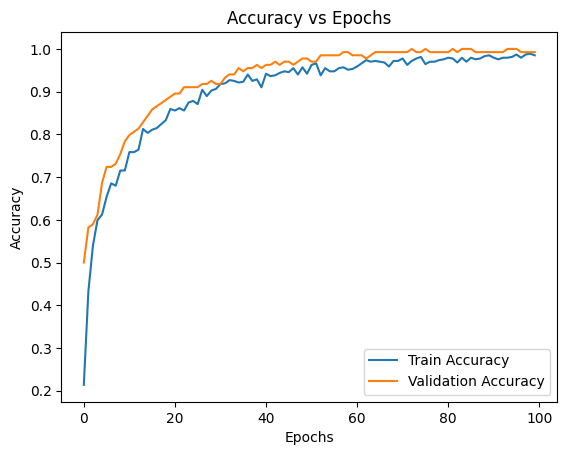

In [ ]:
# Graficar el accuracy durante el entrenamiento
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history_3.history['accuracy'], label='Train Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

## Conclusiones


* **Accuracy:**

Los modelos 2 y 3 tienen la misma precisión más alta (0.64), mientras que el modelo 1 es el más bajo (0.58).
Loss:

* **Loss:**

El modelo 1 tiene la pérdida más baja (2.16), pero a costa de menor precisión.
El modelo 3 tiene una pérdida más baja (2.45) que el modelo 2 (3.38), lo que indica que sus predicciones son más consistentes con las probabilidades asignadas.

Considero que el modelo 3 tiene el mejor balance entre precisión y pérdida. Tiene la misma precisión que el modelo 2, pero con una pérdida significativamente más baja.

Por el momento es el utilizaremos.

En el futuro podríamos aumentar la cantidad de imagenes de la base de datos.

Evaluamos más métricas para el modelo número 3

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


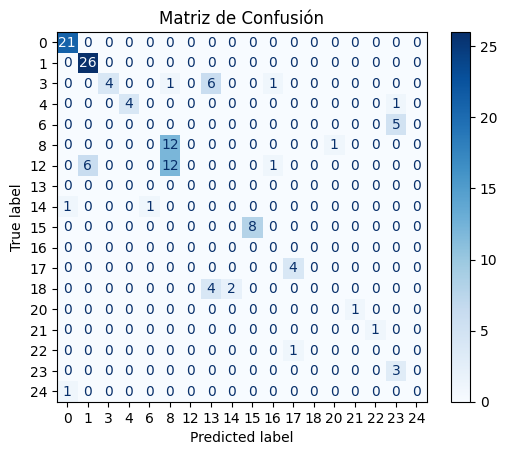

Reporte de Clasificación:
              precision    recall  f1-score   support

     Clase 0       0.91      1.00      0.95        21
     Clase 1       0.81      1.00      0.90        26
     Clase 3       1.00      0.33      0.50        12
     Clase 4       1.00      0.80      0.89         5
     Clase 6       0.00      0.00      0.00         5
     Clase 8       0.48      0.92      0.63        13
    Clase 12       0.00      0.00      0.00        19
    Clase 13       0.00      0.00      0.00         0
    Clase 14       0.00      0.00      0.00         2
    Clase 15       1.00      1.00      1.00         8
    Clase 16       0.00      0.00      0.00         0
    Clase 17       0.80      1.00      0.89         4
    Clase 18       0.00      0.00      0.00         6
    Clase 20       0.00      0.00      0.00         1
    Clase 21       0.00      0.00      0.00         1
    Clase 22       0.00      0.00      0.00         1
    Clase 23       0.33      1.00      0.50         3
 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
# Obtener las predicciones del modelo 3
y_pred_probs = model_3.predict(X_test)  # Predicciones como probabilidades
y_pred = np.argmax(y_pred_probs, axis=1)  # Convertir a etiquetas (clase con mayor probabilidad)
y_true = np.argmax(y_test, axis=1)  # Convertir etiquetas reales de one-hot a enteros

# Imprimir matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Obtener todas las etiquetas únicas presentes en los datos (tanto true como pred)
all_labels = np.unique(np.concatenate((y_true, y_pred)))

# Usar all_labels en display_labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_labels)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión")
plt.show()

# Reporte de métricas (Precision, Recall, F1-score, Accuracy por clase)
print("Reporte de Clasificación:")
print(classification_report(y_true, y_pred, target_names=[f"Clase {i}" for i in all_labels]))

## Info extra



1. Observaciones generales:
Accuracy Global: 64%. Esto significa que el modelo predice correctamente el 64% de las muestras de prueba.

Desempeño por clase:
Algunas clases, como Clase 0, Clase 1, y Clase 15, tienen muy buenos valores de precisión, recall y F1-score.

Otras clases, como Clase 3 y Clase 8, tienen buen recall pero su precisión es inconsistente.
Varias clases (por ejemplo, Clase 6, Clase 12, Clase 18) tienen valores nulos o muy bajos en las métricas, lo que indica que el modelo tiene problemas para predecirlas correctamente.

2. Problemas detectados:
Clases minoritarias (Clase 6, Clase 14, etc.):
Estas clases tienen pocas muestras, lo que dificulta que el modelo aprenda patrones representativos. Esto se refleja en el recall de 0.0 para estas clases.
Desbalance de datos:
La precisión es alta en clases con más datos, como la Clase 0 y la Clase 1, pero muy baja en las demás.

3. Métricas agregadas:
Macro avg:
Promedio de las métricas por clase, sin tener en cuenta el tamaño de las clases. Esto es útil para ver el desempeño en clases minoritarias.
Valores bajos (Precision: 0.35, Recall: 0.39) indican que el modelo tiene dificultades con varias clases.
Weighted avg:
Promedio ponderado según el tamaño de las clases. Representa mejor el desempeño global del modelo.
Precision: 0.59, Recall: 0.64, F1: 0.59.

## Posibles cosas para hacer

* Data Augmentation para Clases Minoritarias

* Uso de un Modelo Más Complejo

* Pesos Balanceados en el Entrenamiento:
Usar el argumento class_weight en el método .fit() para asignar mayor peso a las clases menos representadas.

Probar con yolo o algo para no perder las imagenes